<a href="https://colab.research.google.com/github/jnmelchorg/pyensys/blob/master/PowerTech_Tutorial_PyEnSyS_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#POWERTECH tutorial - 4 bus example

##TEST CASE DESCRIPTION

A 4 bus example system has been selected to ilustrate how to import the libraries and run a simple example using pyensys. More descriptive results will be presented in the following presentations.

Let's begin by describing the test system.

The 4 bus system has 4 buses with demands, and 8 generators that represent thermal, hydropower and renewable technologies.

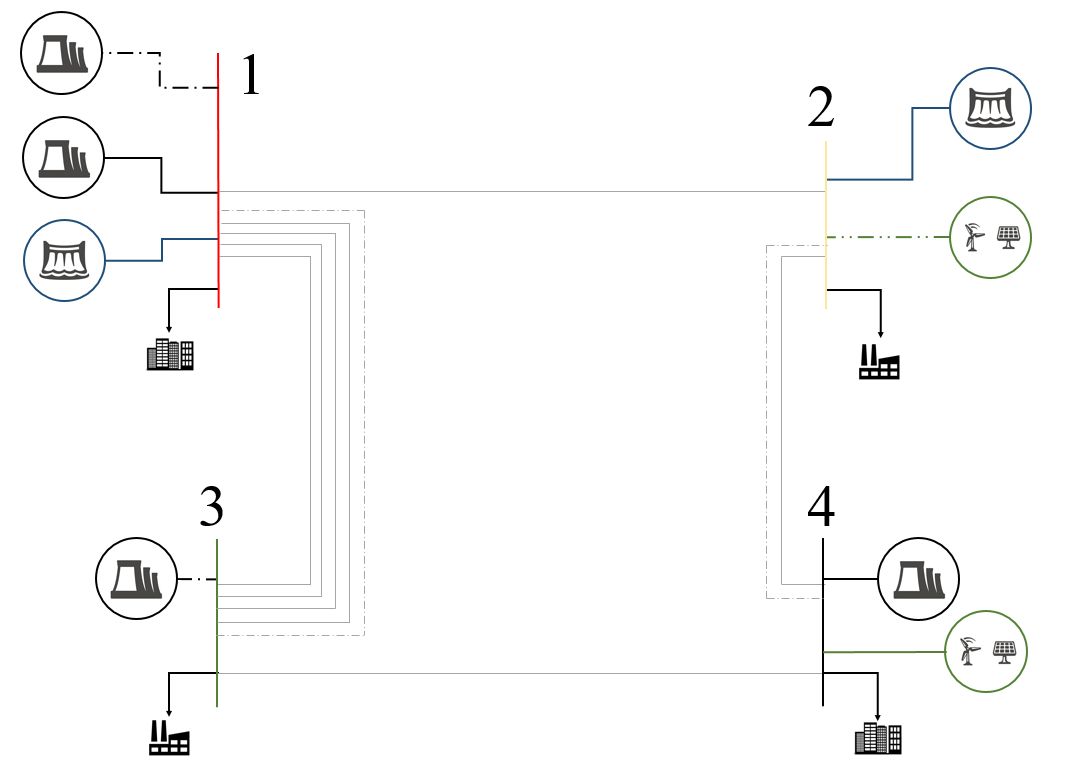

The data is presented in the widely know matpower format. The data of this small test case is described in the tables below:

Data for buses:

| bus_i  | type     |  Pd   | Qd   | Gs   | Bs   | area     | Vm   | Va   | baseKV   | zone     | Vmax     | Vmin |
|:------:|:--------:|:-----:|:----:|:----:|:----:|:--------:|:----:|:----:|:--------:|:--------:|:--------:|:----:|
|   1    |    3     |  150  | 0    | 0    | 0    |   1      | 1    | 0    |   230    |   1      |   1.1    | 0.9  |
|   2    |    2     |  510  | 0    | 0    | 0    |   1      | 1    | 0    |   230    |   1      |   1.1    | 0.9  |
|   3    |    1     |  600  | 0    | 0    | 0    |   1      | 1    | 0    |   230    |   1      |   1.1    | 0.9  |
|   4    |    2     |  240  | 0    | 0    | 0    |   1      | 1    | 0    |   230    |   1      |   1.1    | 0.9  |

Data for thermal and renewable generators generators:

| bus    | Pg   | Qg   | Qmax     | Qmin     |   Vg     | mBase    | status   | Pmax     | Pmin     | Pc1  | Pc2  | Qc1min   | Qc1max   | Qc2min   | Qc2max   | ramp_agc     | ramp_10  | ramp_30  | ramp_q   | apf |
|:------:|:----:|:----:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:----:|:----:|:--------:|:--------:|:--------:|:--------:|:------------:|:--------:|:--------:|:--------:|:---:|
|  1     | 0    | 0    |   100    | -100     | 1        |   100    |   0      | 1000     |   0      | 0    | 0    |   0      |   0      |   0      |   0      |     0        |   0      |   0      |   0      |  0  |
|  1     | 0  | 0    |   100    | -100     | 1.02     |   100    |   1      | 300      |   0      | 0    | 0    |   0      |   0      |   0      |   0      |     0        |   0      |   0      |   0      |  0  |
|  2     | 0  | 0    |   100    | -100     | 1.02     |   100    |   0      | 1000     |   0      | 0    | 0    |   0      |   0      |   0      |   0      |     0        |   0      |   0      |   0      |  0  |
|  3     | 0  | 0    |   100    | -100     | 1.02     |   100    |   0      | 1000     |   0      | 0    | 0    |   0      |   0      |   0      |   0      |     0        |   0      |   0      |   0      |  0  |
|  4     | 0  | 0    |   100    | -100     | 1.02     |   100    |   1      | 150      |   0      | 0    | 0    |   0      |   0      |   0      |   0      |     0        |   0      |   0      |   0      |  0  |
|  4     | 0  | 0    |   100    | -100     | 1.02     |   100    |   1      | 300      |   0      | 0    | 0    |   0      |   0      |   0      |   0      |     0        |   0      |   0      |   0      |  0  |

Data for hydropower generators:

| bus    | Pg   | Qg   | Qmax     | Qmin     |   Vg     | mBase    | status   | Pmax     | Pmin     | Pc1  | Pc2  | Qc1min   | Qc1max   | Qc2min   | Qc2max   | ramp_agc     | ramp_10  | ramp_30  | ramp_q   | apf |
|:------:|:----:|:----:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:----:|:----:|:--------:|:--------:|:--------:|:--------:|:------------:|:--------:|:--------:|:--------:|:---:|
|  1     | 0    | 0    |   0    | 0     | 1        |   100    |   1      | 700     |   0      | 0    | 0    |   0      |   0      |   0      |   0      |     0        |   0      |   0      |   0      |  0  |
|  2     | 0  | 0    |   0    | 0     | 1     |   100    |   1      | 400      |   0      | 0    | 0    |   0      |   0      |   0      |   0      |     0        |   0      |   0      |   0      |  0  |

Data for transformers and transmission lines:

| fbus   | tbus     |   r      |   x      |   b      | rateA    | rateB    | rateC    | ratio    | angle    | status   | angmin   | angmax |
|:------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:------:|
|  1     |   2      | 0.01008  | 0.0504   | 0.1025   |   150    |   250    |   250    |   0      |   0      |   1      | -360     |  360   |
|  1     |   3      | 0.00744  | 0.0372   | 0.0775   |   150    |   250    |   250    |   0      |   0      |   1      | -360     |  360   |
|  1     |   3      | 0.00744  | 0.0372   | 0.0775   |   150    |   250    |   250    |   0      |   0      |   1      | -360     |  360   |
|  1     |   3      | 0.00744  | 0.0372   | 0.0775   |   150    |   250    |   250    |   0      |   0      |   1      | -360     |  360   |
|  1     |   3      | 0.00744  | 0.0372   | 0.0775   |   150    |   250    |   250    |   0      |   0      |   1      | -360     |  360   |
|  1     |   3      | 0.00744  | 0.0372   | 0.0775   |   150    |   250    |   250    |   0      |   0      |   0      | -360     |  360   |
|  2     |   4      | 0.00744  | 0.0372   | 0.0775   |   150    |   250    |   250    |   0      |   0      |   1      | -360     |  360   |
|  2     |   4      | 0.00744  | 0.0372   | 0.0775   |   150    |   250    |   250    |   0      |   0      |   0      | -360     |  360   |
|  3     |   4      | 0.01272  | 0.0636   | 0.1275   |   150    |   250    |   250    |   0      |   0      |   0      | -360     |  360   |

Generation cost data for thermal and renewable generators:

|Model |ramp_up|ramp_down|# coefficients|a<sub>2</sub>|a<sub>1</sub>|a<sub>0</sub>|
|------|------|------|------|------|------|------|
| 2    | 0    | 0    | 3    | 0    | 1    | 0    |
| 2    | 0    | 0    | 3    | 0    | 300  | 0    |
| 2    | 0    | 0    | 3    | 0    | 100  | 0    |
| 2    | 0    | 0    | 3    | 0    | 100  | 0    |
| 2    | 0    | 0    | 3    | 0    | 10   | 0    |
| 2    | 0    | 0    | 3    | 0    | 200  | 0    |

Generation cost data for hydropower generators:

|Model |ramp_up|ramp_down|# coefficients|a<sub>2</sub>|a<sub>1</sub>|a<sub>0</sub>|
|------|------|------|------|------|------|------|
| 2    | 0    | 0    | 3    | 0    | 1    | 0    |
| 2    | 0    | 0    | 3    | 0    | 1  | 0    |

For this example we will use the following time-series and representative days for the energy demand:

|   hour  |    0   |    1    |    2    |    3    |    4    |    5    |    6    |    7    |    8   |    9    |    10   |    11   |    12   |    13   |    14   |    15   |   16   |    17   |    18   |    19   |    20   |    21   |    22   |    23   |
|:-------:|:------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
| weekday | 0.4819 |  0.5310 |  0.5014 |  0.4587 |  0.4280 |  0.4282 |  0.5326 |  0.7258 |   0.8  |  0.8058 |  0.7997 |  0.7930 |  0.7980 |  0.7516 |  0.7371 |  0.7653 | 0.9142 |  1.0000 |  0.9401 |  0.8702 |  0.7960 |  0.7441 |  0.6415 |  0.4969 |
| weekend | 0.5272 |  0.5521 |  0.5076 |  0.4580 |  0.4224 |  0.4059 |  0.4369 |  0.4927 | 0.5804 |  0.6698 |  0.7147 |  0.7312 |  0.7464 |  0.6920 |  0.6365 |  0.6475 | 0.7496 |  0.8689 |  0.8854 |  0.8421 |  0.7675 |  0.7148 |  0.6274 |  0.5115 |

## RUNNING PYENSYS

In [ ]:
!pip install ply pyomo pypsa


     |████████████████████████████████| 8.9MB 12.9MB/s 
  Using cached https://files.pythonhosted.org/packages/67/82/f9e18466ddb844de85e086997f05d7aa9b43e166b5e52437b4918bc9065d/pypsa-0.17.1.tar.gz
  Created wheel for pypsa: filename=pypsa-0.17.1-py2.py3-none-any.whl size=133868 sha256=844902f7fa2ad68520fd1e1652d6f8899ec472dcb5481ea09a919de0764d0944
  Stored in directory: /root/.cache/pip/wheels/61/c8/bc/95ba325a734f0ac693d77d479ba189859a1f375fdc64ed38fc
Successfully built pypsa


In [ ]:
!pip install pyensys --install-option="--without-clp" --install-option="--without-glpk"

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
  Using cached https://files.pythonhosted.org/packages/f1/89/2bdbcd77e84c7fb7e9da0c89d973ed053bf6574066b21e56e3c5a7cf94ef/pyensys-0.0.3.tar.gz
Skipping wheel build for pyensys, due to binaries being disabled for it.
    Running setup.py install for pyensys ... done


In [ ]:
from pyensys.engines.main import pyeneConfig, pyeneClass
from pyomo.core import ConcreteModel
import pyomo.environ
from pyomo.opt import SolverFactory

conf = pyeneConfig()

conf.EM.settings['File'] = '/content/ResolutionTreeWeek.json'

conf.NM.settings['File'] = '/content/case4m1.json'

conf.NM.settings['Flag'] = True
conf.NM.settings['Losses'] = False
conf.NM.settings['Feasibility'] = True
conf.NM.settings['NoTime'] = 24  # Number of time steps
conf.NM.scenarios['Weights'] = [1 for _ in range(24)]  # Add weights 
    # to the time steps
# Scenarios
conf.NM.scenarios['NoDem'] = 2  # Number of demand profiles

conf.NM.hydropower['Number'] = 2  # Number of hydropower plants
conf.NM.hydropower['Bus'] = [1, 2]  # Location (bus) of hydro
conf.NM.hydropower['Max'] = [700, 400]  # Generation capacity
conf.NM.hydropower['Cost'] = [1, 1]  # Costs

conf.HM.settings['Flag'] = False
conf.NM.scenarios['NoRES'] = 0  # Number of RES profiles

# Create object
EN = pyeneClass(conf.EN)
# Initialise with selected configuration
EN.initialise(conf)

# DEMAND PROFILES
Dem1 = [0.4819, 0.5310, 0.5014, 0.4587, 0.4280, 0.4282, 0.5326, 0.7258, 
0.8000, 0.8058, 0.7997, 0.7930, 0.7980, 0.7516, 0.7371, 0.7653, 
0.9142, 1.0000, 0.9401, 0.8702, 0.7960, 0.7441, 0.6415, 0.4969]
Dem2 = [0.5272, 0.5521, 0.5076, 0.4580, 0.4224, 0.4059, 0.4369, 0.4927, 
0.5804, 0.6698, 0.7147, 0.7312, 0.7464, 0.6920, 0.6365, 0.6475, 
0.7496, 0.8689, 0.8854, 0.8421, 0.7675, 0.7148, 0.6274, 0.5115]
EN.set_Demand(1, Dem1)
EN.set_Demand(2, Dem2)

EN.set_Hydro(1, 40000)
EN.set_Hydro(2, 100000)

# Run integrated pyene
m = EN.run(solver="pyomo")

EN.Print_ENSim(m)

Error: No module named 'pyensys.engines.cython.cpp_energy_wrapper'
Error: No module named 'pyensys.engines.cython._glpk'
Vector No: 0
SoC[  0 ][0:1]=[      0.00 ,       0.00 ]
SoC[  1 ][0:1]=[      0.00 ,       0.00 ]
SoC[  2 ][0:1]=[      0.00 ,       0.00 ]
SoC[  3 ][0:1]=[      0.00 ,       0.00 ]
Vector No: 1
SoC[  0 ][0:1]=[      0.00 ,       0.00 ]
SoC[  1 ][0:1]=[      0.00 ,       0.00 ]
SoC[  2 ][0:1]=[      0.00 ,       0.00 ]
SoC[  3 ][0:1]=[      0.00 ,       0.00 ]

% CASE: 0

Flow_EGen_Bus= [1 1 2 3 4 4 1 2] ;

Flow_EGen=[
  0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000  19.1667   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000 
  0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000 
 73.1646 106.6566  86.4